In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

In [3]:
dfx = pd.read_csv("D:\VS\Coding-Blocks-ML\LOWESS\weightedX.csv")
dfy = pd.read_csv("D:\VS\Coding-Blocks-ML\LOWESS\weightedY.csv")

In [4]:
X = dfx.values
Y = dfy.values
print(X.shape, Y.shape)

(99, 1) (99, 1)


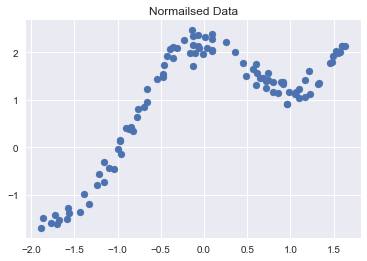

In [7]:
u = X.mean()
std = X.std()
X = (X-u)/std

plt.scatter(X, Y)
plt.title("Normailsed Data")
plt.show()

In [8]:
def getW(query_point, X, tau):
    m = X.shape[0]
    w = np.mat(np.eye(m))

    for i in range(m):
        xi = X[i]
        x = query_point
        w[i, i] = np.dot((xi-x), (xi-x).T)/(-2*tau*tau)
    return w

In [10]:
X = np.mat(X)
Y = np.mat(X)
M = X.shape[0]

W = getW(-1, X, 0.5)
print(W.shape)
print(W)

(99, 99)
[[-0.82676741  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         -0.06641591  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         -0.83334467 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -2.047524    0.
   0.        ]
 [ 0.          0.          0.         ...  0.         -5.15198956
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  -9.86192043]]


In [16]:
def predict(X, Y, query_x, tau):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_ = np.hstack((X, ones))
    qx = np.mat([query_x, 1])
    W = getW(qx, X_, tau)
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx, theta)
    return theta, pred

In [17]:
theta, pred = predict(X, Y, 1.0, 1.0)
print(theta, pred)

[[1.00000000e+00]
 [1.33226763e-15]] [[1.]]


In [19]:
def plotPredict(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []

    for xq in X_test:
        theta, pred = predict(X, Y, xq, tau)
        Y_test.append(pred)
    Y_test = np.array(Y_test)

    XO = np.array(X)
    YO = np.array(Y)

    plt.scatter(XO, YO)
    plt.scatter(X_test, Y_test)
    plt.show()

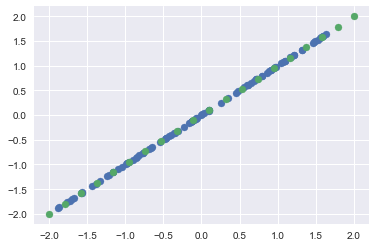

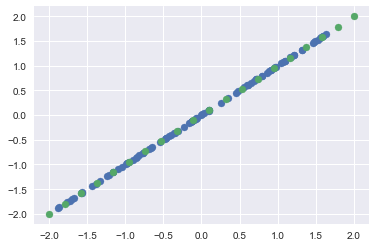

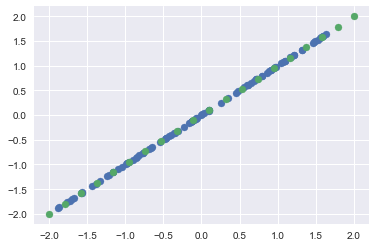

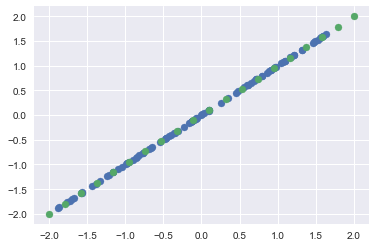

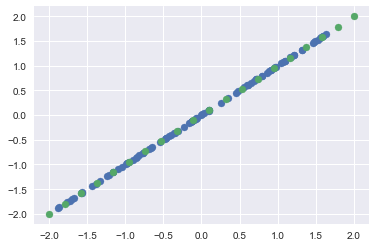

In [20]:
taus = [0.1, 0.5, 1, 5, 10]
for t in taus:
    plotPredict(t)